Tasks:

Fekry & Rafik:
- Optimize the prompt: use chat gpt or https://www-feedough-com.webpkgcache.com/doc/-/s/www.feedough.com/ai-prompt-generator/
                                       https://neuralwriter.com/prompt-tool/
- Check Error pipe and add a token, representing any error for the result of the check program --> done
- Optimize the prompt of generating test cases: “Do not include any comments” --> done
- Check stdout because it could lead to a problem if the code includes more than one print statement --> done
- Check other ways to evaluate a testcase with a code other than the printing method
- Utilize Amer’s function of removing Comments from all generated codes
- Generating json files for LLM outputs
- Look at the low pass rate samples and see why they are low; low red
- Try different temps 0.3, 0.5, 0.7
- Effect of number of test cases --> plot num of test cases vs correlation
- Run on APPS
- the testcase generation prompt must take a code to be sure of the input


Amer:
- OpenAI evaluation: exact match, contains, partial match, fuzzy match: https://github.com/openai/evals/blob/main/docs/eval-templates.md 
- prompt optimization
- invistigate deepsim lw 7abb


Amr:
- Parallelize the execution process
- e3mlna wa7da docker 3shan yb2a koloh tmam


Fathy:
- run old experiments on distance correlation
- Website: 

         a user flag to determine whether the output is deterministic or not to help with exact match output strings and lists

         a user flag to config timeout

         a user box to enter his OpenAI API key, or change community deployment to business model


Tolba:
- Draft the paper


ALL:
- Continue with GPT-4 or higher
- We need to think about the scope: in terms of: 
    1. The functions with no output, 
    2. Different languages. 
    3. DIfferent LLMs  
    4. Difficulty levels of functions 
    5. Input type


AT THE END:
- do the correlation scatter plot that Rafea mentioned
- criticize the model output by using two agents like GANs: generating and critique https://arxiv.org/abs/2310.13855 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import re
import argparse
import csv
import json
import pprint
import subprocess
import dcor

# Invistigating low red points

In [8]:
df = pd.read_csv('dataset_human_eval_model_gpt4-api_n_5_tempr_0.7_temps_0.7_trial_100.csv')
df = df.drop(32)
df['avg_pass_rate'] = df[[f'pass_rate_{j}' for j in range(6)]].mean(axis=1)
df.sort_values(by=['avg_pass_rate'], inplace=True)
df

,task_id,prompt,code_0,code_1,code_2,code_3,code_4,code_5,pass_rate_0,pass_rate_1,pass_rate_2,pass_rate_3,pass_rate_4,pass_rate_5,avg_pass_rate
50,HumanEval/50,"\n\ndef encode_shift(s: str):\n """"""\n re...","def decode_shift(s: str):\n """"""\n takes ...","def decode_shift(s: str):\n """"""\n takes ...","def decode_shift(s: str):\n """"""\n takes ...","def decode_shift(s: str):\n """"""\n takes ...","def decode_shift(s: str):\n """"""\n takes ...","def decode_shift(s: str):\n """"""\n takes ...",0.0,0.0,0.0,0.0,0.0,0.0,0.000000
38,HumanEval/38,"\n\ndef encode_cyclic(s: str):\n """"""\n r...","def decode_cyclic(s: str):\n """"""\n takes...","def decode_cyclic(s: str):\n """"""\n takes...","def decode_cyclic(s: str):\n """"""\n takes...","def decode_cyclic(s: str):\n """"""\n takes...","def decode_cyclic(s: str):\n """"""\n takes...","def decode_cyclic(s: str) -> str:\n """"""\n ...",0.0,0.0,0.0,0.0,0.0,0.0,0.000000
163,HumanEval/163,"\ndef generate_integers(a, b):\n """"""\n G...","def generate_integers(a, b):\n """"""\n Giv...","def generate_integers(a, b):\n """"""\n Giv...","def generate_integers(a, b):\n """"""\n Giv...","def generate_integers(a, b):\n """"""\n Giv...","def generate_integers(a, b):\n """"""\n Giv...","def generate_integers(a, b):\n """"""\n Giv...",0.0,0.0,0.0,0.0,0.0,0.0,0.000000
39,HumanEval/39,"\n\ndef prime_fib(n: int):\n """"""\n prime...",import sympy\n\ndef prime_fib(n: int) -> int:\...,import math\n\ndef is_prime(num: int) -> bool:...,from sympy import isprime\n\ndef prime_fib(n: ...,import sympy\n\ndef prime_fib(n: int) -> int:\...,from sympy import isprime\n\ndef prime_fib(n: ...,import sympy\n\ndef prime_fib(n: int) -> int:\...,0.0,100.0,0.0,0.0,0.0,0.0,16.666667
75,HumanEval/75,"\ndef is_multiply_prime(a):\n """"""Write a fu...",import math\n\ndef is_prime(n):\n if n <= 1...,from sympy import isprime\n\ndef is_multiply_p...,from sympy import isprime\n\ndef is_multiply_p...,from sympy import isprime\n\ndef is_multiply_p...,from sympy import isprime\n\ndef is_multiply_p...,from sympy import isprime\n\ndef is_multiply_p...,100.0,0.0,0.0,0.0,0.0,0.0,16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,HumanEval/158,"\ndef find_max(words):\n """"""Write a functio...",from collections import defaultdict\n\ndef fin...,"def find_max(words):\n """"""Write a function ...","def find_max(words):\n """"""Write a function ...",from collections import defaultdict\n\ndef fin...,"def find_max(words):\n """"""Write a function ...","def find_max(words):\n """"""Write a function ...",100.0,100.0,100.0,100.0,100.0,100.0,100.000000
133,HumanEval/133,"\n\ndef sum_squares(lst):\n """"""You are give...","import math\n\ndef sum_squares(lst):\n """"""Y...","import math\n\ndef sum_squares(lst):\n """"""Y...",import math\n\ndef sum_squares(lst):\n retu...,"import math\n\ndef sum_squares(lst):\n """"""Y...","import math\n\ndef sum_squares(lst):\n """"""Y...",import math\n\ndef sum_squares(lst):\n retu...,100.0,100.0,100.0,100.0,100.0,100.0,100.000000
159,HumanEval/159,"\ndef eat(number, need, remaining):\n """"""\n...","def eat(number, need, remaining):\n """"""\n ...","def eat(number, need, remaining):\n """"""\n ...","def eat(number, need, remaining):\n """"""\n ...","def eat(number, need, remaining):\n """"""\n ...","def eat(number, need, remaining):\n """"""\n ...","def eat(number, need, remaining):\n """"""\n ...",100.0,100.0,100.0,100.0,100.0,100.0,100.000000
161,HumanEval/161,"\ndef solve(s):\n """"""You are given a string...","def solve(s):\n """"""You are given a string s...",def solve(s):\n if all(not c.isalpha() for ...,"def solve(s):\n """"""You are given a string s...","def solve(s):\n """"""You are given a string s...",def solve(s):\n if all(not c.isalpha() for ...,"def solve(s):\n """"""You are given a string s...",100.0,100.0,100.0,100.0,100.0,100.0,100.000000


In [10]:
low_df = df[df['avg_pass_rate'] <= 60]
low_df

,task_id,prompt,code_0,code_1,code_2,code_3,code_4,code_5,pass_rate_0,pass_rate_1,pass_rate_2,pass_rate_3,pass_rate_4,pass_rate_5,avg_pass_rate
50,HumanEval/50,"\n\ndef encode_shift(s: str):\n """"""\n re...","def decode_shift(s: str):\n """"""\n takes ...","def decode_shift(s: str):\n """"""\n takes ...","def decode_shift(s: str):\n """"""\n takes ...","def decode_shift(s: str):\n """"""\n takes ...","def decode_shift(s: str):\n """"""\n takes ...","def decode_shift(s: str):\n """"""\n takes ...",0.0,0.0,0.0,0.0,0.0,0.0,0.000000
38,HumanEval/38,"\n\ndef encode_cyclic(s: str):\n """"""\n r...","def decode_cyclic(s: str):\n """"""\n takes...","def decode_cyclic(s: str):\n """"""\n takes...","def decode_cyclic(s: str):\n """"""\n takes...","def decode_cyclic(s: str):\n """"""\n takes...","def decode_cyclic(s: str):\n """"""\n takes...","def decode_cyclic(s: str) -> str:\n """"""\n ...",0.0,0.0,0.0,0.0,0.0,0.0,0.000000
163,HumanEval/163,"\ndef generate_integers(a, b):\n """"""\n G...","def generate_integers(a, b):\n """"""\n Giv...","def generate_integers(a, b):\n """"""\n Giv...","def generate_integers(a, b):\n """"""\n Giv...","def generate_integers(a, b):\n """"""\n Giv...","def generate_integers(a, b):\n """"""\n Giv...","def generate_integers(a, b):\n """"""\n Giv...",0.0,0.0,0.0,0.0,0.0,0.0,0.000000
39,HumanEval/39,"\n\ndef prime_fib(n: int):\n """"""\n prime...",import sympy\n\ndef prime_fib(n: int) -> int:\...,import math\n\ndef is_prime(num: int) -> bool:...,from sympy import isprime\n\ndef prime_fib(n: ...,import sympy\n\ndef prime_fib(n: int) -> int:\...,from sympy import isprime\n\ndef prime_fib(n: ...,import sympy\n\ndef prime_fib(n: int) -> int:\...,0.0,100.0,0.0,0.0,0.0,0.0,16.666667
75,HumanEval/75,"\ndef is_multiply_prime(a):\n """"""Write a fu...",import math\n\ndef is_prime(n):\n if n <= 1...,from sympy import isprime\n\ndef is_multiply_p...,from sympy import isprime\n\ndef is_multiply_p...,from sympy import isprime\n\ndef is_multiply_p...,from sympy import isprime\n\ndef is_multiply_p...,from sympy import isprime\n\ndef is_multiply_p...,100.0,0.0,0.0,0.0,0.0,0.0,16.666667
83,HumanEval/83,"\ndef starts_one_ends(n):\n """"""\n Given ...","def starts_one_ends(n):\n """"""\n Given a ...","def starts_one_ends(n):\n """"""\n Given a ...",from itertools import product\n\ndef starts_on...,"def starts_one_ends(n):\n """"""\n Given a ...","def starts_one_ends(n):\n """"""\n Given a ...","def starts_one_ends(n):\n """"""\n Given a ...",20.0,40.0,20.0,20.0,20.0,20.0,23.333333
130,HumanEval/130,"\ndef tri(n):\n """"""Everyone knows Fibonacci...","def tri(n):\n """"""Everyone knows Fibonacci s...","def tri(n):\n """"""Everyone knows Fibonacci s...","def tri(n):\n """"""Everyone knows Fibonacci s...","def tri(n):\n """"""Everyone knows Fibonacci s...","def tri(n):\n """"""Everyone knows Fibonacci s...","def tri(n):\n """"""Everyone knows Fibonacci s...",20.0,20.0,20.0,100.0,20.0,20.0,33.333333
127,HumanEval/127,"\ndef intersection(interval1, interval2):\n ...",from sympy import isprime\n\ndef intersection(...,"import math\n\ndef intersection(interval1, int...",from sympy import isprime\n\ndef intersection(...,"import math\n\ndef intersection(interval1, int...",from sympy import isprime\n\ndef intersection(...,"import math\n\ndef is_prime(num):\n """""" Hel...",0.0,75.0,0.0,75.0,0.0,75.0,37.500000
145,HumanEval/145,"\ndef order_by_points(nums):\n """"""\n Wri...",from functools import cmp_to_key\n\ndef order_...,from functools import cmp_to_key\n\ndef order_...,from typing import List\n\ndef order_by_points...,from functools import cmp_to_key\n\ndef order_...,"def order_by_points(nums):\n """"""\n Write...","def order_by_points(nums):\n """"""\n Write...",50.0,50.0,50.0,50.0,50.0,50.0,50.000000
149,HumanEval/149,"\ndef sorted_list_sum(lst):\n """"""Write a fu...","def list_sort(lst):\n """"""Write a function t...","def sorted_list_sum(lst):\n """"""Write a func...","def list_sort(lst):\n """"""Sorts the list by ...","def sort

In [15]:
for i in range(len(low_df)):
    print('Prompt:', low_df.iloc[i]['prompt'])
    for j in range(6):
        print(f'Code {j}:')
        print(low_df.iloc[i][f'code_{j}'])
        print(low_df.iloc[i][f'pass_rate_{j}'])
        print('-----------------')
    print('------------------------------------------------------------------------')

Prompt: 

def encode_shift(s: str):
    """
    returns encoded string by shifting every character by 5 in the alphabet.
    """
    return "".join([chr(((ord(ch) + 5 - ord("a")) % 26) + ord("a")) for ch in s])


def decode_shift(s: str):
    """
    takes as input string encoded with encode_shift function. Returns decoded string.
    """

Code 0:
def decode_shift(s: str):
    """
    takes as input string encoded with encode_shift function. Returns decoded string.
    """
    return "".join([chr(((ord(ch) - 5 - ord("a")) % 26) + ord("a")) for ch in s])
0.0
-----------------
Code 1:
def decode_shift(s: str):
    """
    takes as input string encoded with encode_shift function. Returns decoded string.
    """
    return "".join([chr(((ord(ch) - 5 - ord("a")) % 26) + ord("a")) for ch in s])
0.0
-----------------
Code 2:
def decode_shift(s: str):
    """
    takes as input string encoded with encode_shift function. Returns decoded string.
    """
    return "".join([chr(((ord(ch) - 5 - or

# AZURE API

In [2]:
from openai import AzureOpenAI
# gets the API Key from environment variable AZURE_OPENAI_API_KEY
client = AzureOpenAI(
    azure_endpoint="https://team5-chatgpt-4-api.openai.azure.com/",
    api_version = "2024-10-01-preview",  # Use the latest available version
    api_key = "9423fcf02a494b5cbe440c6971903ba7",
)

In [3]:
#read the dataset from the jsonl file
df = pd.read_json('human-eval-modified-with-tests.jsonl', lines=True)

df.head()

,task_id,prompt,entry_point,canonical_solution,test,GPT4_10_generated_tests_1,GPT4_10_generated_tests_0.7,GPT4_10_generated_tests_0.5
0,HumanEval/0,from typing import List\n\n\ndef has_close_ele...,has_close_elements,"for idx, elem in enumerate(numbers):\n ...","\n\nMETADATA = {\n 'author': 'jt',\n 'da...","has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...","has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...","has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h..."
1,HumanEval/1,from typing import List\n\n\ndef separate_pare...,separate_paren_groups,result = []\n current_string = []\n ...,"\n\nMETADATA = {\n 'author': 'jt',\n 'da...",separate_paren_groups('')#lak#separate_paren_g...,separate_paren_groups('((()))')#lak#separate_p...,"separate_paren_groups(""()"")#lak#separate_paren..."
2,HumanEval/2,\n\ndef truncate_number(number: float) -> floa...,truncate_number,return number % 1.0\n,"\n\nMETADATA = {\n 'author': 'jt',\n 'da...",truncate_number(5.0)#lak#truncate_number(1.987...,truncate_number(4.76)#lak#truncate_number(0.99...,truncate_number(5.0)#lak#truncate_number(0.999...
3,HumanEval/3,from typing import List\n\n\ndef below_zero(op...,below_zero,balance = 0\n\n for op in operations:\n...,"\n\nMETADATA = {\n 'author': 'jt',\n 'da...","below_zero([10, -5, 5, -10])#lak#below_zero([1...","below_zero([1, 2, 3])#lak#below_zero([1, 2, -4...","below_zero([1, 2, 3])#lak#below_zero([1, 2, -4..."
4,HumanEval/4,from typing import List\n\n\ndef mean_absolute...,mean_absolute_deviation,mean = sum(numbers) / len(numbers)\n re...,"\n\nMETADATA = {\n 'author': 'jt',\n 'da...","mean_absolute_deviation([1.0, 2.0, 3.0, 4.0, 5...","mean_absolute_deviation([1.0, 2.0, 3.0, 4.0])#...","mean_absolute_deviation([1.0, 2.0, 3.0, 4.0])#..."


# Generating the test cases as function calls with test inputs

In [7]:
# chat completion
responses = pd.DataFrame(columns=['taskID', 'prompt', 'entry_point', 'response'])

taskID = df['task_id'].tolist()
prompts = df['prompt'].tolist()
entry_points = df['entry_point'].tolist()

l = len(df)

tests_num = 10
tests_temperature = 0.5

for i in range(l):
    ID = taskID[i]
    problem_statement = prompts[i]
    entry_point = entry_points[i]
        
    response = client.chat.completions.create(
        model="gpt-4-turbo-2024-04-09",  # The name you used when deploying the model
        messages=[
            {"role": "system", "content": "You are a helpful Python programming assistant. Your objective is to create test inputs for the given problem."},
            {"role": "user", "content": f"""For the given problem statement, create test inputs. The format of the input is a list of inputs.\n
                                        The problem statement is: \n{problem_statement}\n.
                                        The entry point is: {entry_point}\n,
                                        The input list is {tests_num} inputs representing {tests_num} test cases. Cover basic test cases and edge cases.
                                        Return only the function calls with each of the test cases, each in a separate line, without any other text or comments."""},
        ], 
        temperature=tests_temperature
    )

    response_text = response.choices[0].message.content
    temp_df = pd.DataFrame([[ID, problem_statement, entry_point, response_text]], columns=['taskID', 'prompt', 'entry_point', 'response'])
    responses = pd.concat([responses, temp_df], ignore_index=True)

# Parsing the test cases as function calls

In [9]:
def remove_outside_quotes(text):
    # Match quotes outside of parentheses and replace them
    # result = re.sub(r'\"(?![^()]*\))', '', text)
    # result = re.sub(r"\'(?![^()]*\))", '', result)
    # return result
    # while text[0] == '"':
    #     text = text.strip('"')
    # return text.strip('"')
    result = re.sub(r'^["\'](.*)["\']$', r'\1', text)
    return result


# create a dataframe to store the inputs and to change dynamically (the columns) based on the number of tests
cols = ['task_id'] + [f'GPT4_{tests_num}_generated_tests_{tests_temperature}']


All = pd.DataFrame(columns=cols)

i = 0
for row in responses.iterrows():
    #parse the response to get the list of inputs
    inputs = row[1]['response'].split("\n")
    #remove any input that doesn't have the entry point
    inputs = [input for input in inputs if row[1]['entry_point'] in input]

    #remove the quotes from the inputs using the function defined above
    inputs = [remove_outside_quotes(input) for input in inputs]

    #remove any leading or trailing whitespaces
    inputs = [input.strip() for input in inputs]

    #remove commas if they are the last character
    inputs = [input[:-1] if input[-1] == ',' else input for input in inputs]

    #remove the quotes from the inputs using the function defined above
    inputs = [remove_outside_quotes(input) for input in inputs]
    #remove the quotes from the inputs using the function defined above
    inputs = [remove_outside_quotes(input) for input in inputs]

    
    # print("\n")
    # print(50*"-")

    inputs = '#lak#'.join(inputs)

    id = row[1]['taskID']
    
    # create a temp dataframe to store the inputs
    temp_df = pd.DataFrame([[id, inputs]], 
                           columns=cols)

    #concatenate the temp dataframe to the All dataframe
    All = pd.concat([All, temp_df], ignore_index=True)
    i += 1

In [10]:
All

,task_id,GPT4_10_generated_tests_0.5
0,HumanEval/0,"has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h..."
1,HumanEval/1,"separate_paren_groups(""()"")#lak#separate_paren..."
2,HumanEval/2,truncate_number(5.0)#lak#truncate_number(0.999...
3,HumanEval/3,"below_zero([1, 2, 3])#lak#below_zero([1, 2, -4..."
4,HumanEval/4,"mean_absolute_deviation([1.0, 2.0, 3.0, 4.0])#..."
...,...,...
159,HumanEval/159,"eat(0, 0, 0)#lak#eat(1000, 1000, 1000)#lak#eat..."
160,HumanEval/160,"do_algebra(['+'], [1, 2])#lak#do_algebra(['-',..."
161,HumanEval/161,"solve(""HelloWorld"")#lak#solve(""1234"")#lak#solv..."
162,HumanEval/162,"string_to_md5(""Hello world"")#lak#string_to_md5..."


In [11]:
#merge all with df to get the final dataframe
# final_df = pd.merge(df, All, on = 'task_id', how='left')
# final_df
final_df = pd.merge(df, All, on='task_id', suffixes=('_df', '_All'))
if f'GPT4_{tests_num}_generated_tests_{tests_temperature}_df' in final_df.columns:
    final_df.drop(columns=[f'GPT4_{tests_num}_generated_tests_{tests_temperature}_df'], inplace=True)
    final_df.rename(columns={f'GPT4_{tests_num}_generated_tests_{tests_temperature}_All': f'GPT4_{tests_num}_generated_tests_{tests_temperature}'}, inplace=True)
final_df

,task_id,prompt,entry_point,canonical_solution,test,GPT4_10_generated_tests_1,GPT4_10_generated_tests_0.7,GPT4_10_generated_tests_0.5
0,HumanEval/0,from typing import List\n\n\ndef has_close_ele...,has_close_elements,"for idx, elem in enumerate(numbers):\n ...","\n\nMETADATA = {\n 'author': 'jt',\n 'da...","has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...","has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...","has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h..."
1,HumanEval/1,from typing import List\n\n\ndef separate_pare...,separate_paren_groups,result = []\n current_string = []\n ...,"\n\nMETADATA = {\n 'author': 'jt',\n 'da...",separate_paren_groups('')#lak#separate_paren_g...,separate_paren_groups('((()))')#lak#separate_p...,"separate_paren_groups(""()"")#lak#separate_paren..."
2,HumanEval/2,\n\ndef truncate_number(number: float) -> floa...,truncate_number,return number % 1.0\n,"\n\nMETADATA = {\n 'author': 'jt',\n 'da...",truncate_number(5.0)#lak#truncate_number(1.987...,truncate_number(4.76)#lak#truncate_number(0.99...,truncate_number(5.0)#lak#truncate_number(0.999...
3,HumanEval/3,from typing import List\n\n\ndef below_zero(op...,below_zero,balance = 0\n\n for op in operations:\n...,"\n\nMETADATA = {\n 'author': 'jt',\n 'da...","below_zero([10, -5, 5, -10])#lak#below_zero([1...","below_zero([1, 2, 3])#lak#below_zero([1, 2, -4...","below_zero([1, 2, 3])#lak#below_zero([1, 2, -4..."
4,HumanEval/4,from typing import List\n\n\ndef mean_absolute...,mean_absolute_deviation,mean = sum(numbers) / len(numbers)\n re...,"\n\nMETADATA = {\n 'author': 'jt',\n 'da...","mean_absolute_deviation([1.0, 2.0, 3.0, 4.0, 5...","mean_absolute_deviation([1.0, 2.0, 3.0, 4.0])#...","mean_absolute_deviation([1.0, 2.0, 3.0, 4.0])#..."
...,...,...,...,...,...,...,...,...
159,HumanEval/159,"\ndef eat(number, need, remaining):\n """"""\n...",eat,if(need <= remaining):\n return [ n...,def check(candidate):\n total_tests_xyz = 6...,"eat(0, 0, 0)#lak#eat(1000, 1000, 1000)#lak#eat...","eat(0, 0, 0)#lak#eat(0, 1, 0)#lak#eat(0, 0, 1)...","eat(0, 0, 0)#lak#eat(1000, 1000, 1000)#lak#eat..."
160,HumanEval/160,"\ndef do_algebra(operator, operand):\n """"""\...",do_algebra,expression = str(operand[0])\n for oprt...,def check(candidate):\n total_tests_xyz = 3...,"do_algebra(['+'], [3, 2])#lak#do_algebra(['-',...","do_algebra(['+'], [2, 3])#lak#do_algebra(['-',...","do_algebra(['+'], [1, 2])#lak#do_algebra(['-',..."
161,HumanEval/161,"\ndef solve(s):\n """"""You are given a string...",solve,flg = 0\n idx = 0\n new_str = list(s...,def check(candidate):\n total_tests_xyz = 8...,"solve(""HelloWorld!"")#lak#solve(""test123"")#lak#...","solve(""1234"")#lak#solve(""ab"")#lak#solve(""#a@C""...","solve(""HelloWorld"")#lak#solve(""1234"")#lak#solv..."
162,HumanEval/162,"\ndef string_to_md5(text):\n """"""\n Given...",string_to_md5,import hashlib\n return hashlib.md5(tex...,def check(candidate):\n total_tests_xyz = 4...,string_to_md5('Hello world')#lak#string_to_md5...,string_to_md5('Hello world')#lak#string_to_md5...,"string_to_md5(""Hello world"")#lak#string_to_md5..."


In [ ]:
final_df.to_csv('human-eval-modified-with-tests.csv', index=False)

#export the final dataframe to a jsonl file
final_df.to_json('human-eval-modified-with-tests.jsonl', orient='records', lines=True)

In [23]:
# tests_num = 10
# df = pd.read_json('human-eval-modified-with-tests.jsonl', lines=True)
# # get all the test cases columns from test_1 to test_10 in one column
# df[f'GPT4_{tests_num}_generated_tests'] = df[[f'test_{j}' for j in range(1, tests_num+1)]].apply(lambda row: '#lak#'.join(row.astype(str)), axis=1)
# df = df.drop(columns=[f'test_{j}' for j in range(1, tests_num+1)])
# df.to_json('human-eval-modified-with-tests.jsonl', orient='records', lines=True)
# df

In [4]:
df = pd.read_json('human-eval-modified-with-tests.jsonl', lines=True)
tests_list = df[f'GPT4_{tests_num}_generated_tests_{tests_temperature}'][0].split('#lak#')
for i in range(len(tests_list)):
    print(tests_list[i], '\n')

has_close_elements([1.0, 2.0, 3.0], 0.5) 

has_close_elements([1.0, 1.1, 3.0], 0.2) 

has_close_elements([5.0, 10.0, 15.0], 5.0) 

has_close_elements([0.1, 0.2, 0.31], 0.11) 

has_close_elements([10.0], 1.0) 

has_close_elements([], 0.5) 

has_close_elements([1.000001, 1.000002], 0.000001) 

has_close_elements([-1.0, -2.0, -3.0], 0.9) 

has_close_elements([1.0, 1.5, 2.0, 2.5, 3.0], 0.51) 

has_close_elements([100, 200, 300, 400, 500], 99) 



# executing the test cases

In [12]:
tests_num = 10
tests_temperature = 0.7 #1 or 0.5 or 0.7

In [35]:
df = pd.read_json('human-eval-modified-with-tests.jsonl', lines=True)
codes = pd.read_csv("runs\gpt4_codes\codetemp_1\dataset_human_eval_model_gpt-4-turbo-2024-04-09_n_5_tempr_1.0_temps_1.0_trial_50.csv")

df_with_codes = pd.merge(df, codes, on = 'task_id', how='inner')

#drop columns that are not needed
df_with_codes = df_with_codes.drop(columns=['prompt_y', 'canonical_solution', 'test', 'entry_point'])
#rename the columns
df_with_codes = df_with_codes.rename(columns={"prompt_x": "prompt"})

#get the average pass_rate for each task_id
df_with_codes['avg_pass_rate'] = df_with_codes[['pass_rate_1', 'pass_rate_2', 'pass_rate_3', 'pass_rate_4', 'pass_rate_5']].mean(axis=1)
# df_with_codes = df_with_codes[df_with_codes['avg_pass_rate'] <= 100]

#drop the pass_rate columns
df_with_codes = df_with_codes.drop(columns=['pass_rate_0','pass_rate_1', 'pass_rate_2', 'pass_rate_3', 'pass_rate_4', 'pass_rate_5'])

# drop the error_rate columns
if 'err_0' in df_with_codes.columns:
    df_with_codes = df_with_codes.drop(columns=['err_0', 'err_1', 'err_2', 'err_3', 'err_4', 'err_5'])

# #add 10 columns to the dataframe to store the results of the tests
# cols = [f'test_{i}_results' for i in range(1, tests+1)]
# df_with_codes[cols] = pd.DataFrame([['' for i in range(10)]], index=df_with_codes.index)

df_with_codes[f'GPT4_{tests_num}_generated_tests_{tests_temperature}_outputs'] = ['' for i in range(len(df_with_codes))]

df_with_codes.head()

,task_id,prompt,GPT4_10_generated_tests_1,GPT4_10_generated_tests_0.7,GPT4_10_generated_tests_0.5,code_0,code_1,code_2,code_3,code_4,code_5,avg_pass_rate,GPT4_10_generated_tests_0.7_outputs
0,HumanEval/0,from typing import List\n\n\ndef has_close_ele...,"has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...","has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...","has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...",from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,100.0,
1,HumanEval/1,from typing import List\n\n\ndef separate_pare...,separate_paren_groups('')#lak#separate_paren_g...,separate_paren_groups('((()))')#lak#separate_p...,"separate_paren_groups(""()"")#lak#separate_paren...",from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,100.0,
2,HumanEval/2,\n\ndef truncate_number(number: float) -> floa...,truncate_number(5.0)#lak#truncate_number(1.987...,truncate_number(4.76)#lak#truncate_number(0.99...,truncate_number(5.0)#lak#truncate_number(0.999...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,100.0,
3,HumanEval/3,from typing import List\n\n\ndef below_zero(op...,"below_zero([10, -5, 5, -10])#lak#below_zero([1...","below_zero([1, 2, 3])#lak#below_zero([1, 2, -4...","below_zero([1, 2, 3])#lak#below_zero([1, 2, -4...",from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,100.0,
4,HumanEval/4,from typing import List\n\n\ndef mean_absolute...,"mean_absolute_deviation([1.0, 2.0, 3.0, 4.0, 5...","mean_absolute_deviation([1.0, 2.0, 3.0, 4.0])#...","mean_absolute_deviation([1.0, 2.0, 3.0, 4.0])#...",from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,100.0,


In [36]:
def run_tests(check_program, test_number, code_number, task_id=None, timeout=40):
    try:
        result = subprocess.run(['python', '-c', check_program], stdout=subprocess.PIPE,
                                        stderr=subprocess.PIPE, timeout=timeout)
        

    except Exception as e:
        with open('error_log.txt', 'a') as f:
            f.write(f"Task ID: {task_id}\n")
            f.write(f"Code number: {code_number}\n")
            f.write(f"Test Number: {test_number}\n")
            f.write("Error:")
            f.write(str(e))
            f.write("\n")
            f.write( 50*"-")
            f.write("\n")
        return "team5_LLM_CODE_verifier_TIMEOUT_ERROR", "team5_LLM_CODE_verifier_TIMEOUT_ERROR"
    # return result
    return result.stdout.decode('utf-8').strip(), result.stderr.decode('utf-8').strip()


In [21]:
# ## loop over each row in the dataset
# # for row in df_with_codes.iterrows():
# #     id = row[1]['task_id']
# #     # loop over the tests to get the test inputs
# #     for j in range(1,11):
        
# #         test = row[1][f'test_{j}']

# #         test_results = []
        
# #         #loop over the codes in the dataset
# #         for i in range(0,6):
# #             code = row[1][f'code_{i}']
# #             test_prepared = f"print({test})"
# #             # test_prepared = test_prepared + "\n" + f"print(type({test}))"
# #             check_program = f"{code}\n{test_prepared}"
# #             res = run_tests(check_program, test_number = j, code_number = i ,task_id = id, timeout=40 )
# #             test_results.append(res)

# #         #update the dataframe with the test results
# #         df_with_codes.at[row[0], f'test_{j}_results'] = test_results

# with open('error_log.txt', 'a') as f:
#     f.write(50*"##")
#     f.write(f'\nGPT4_{tests_num}_generated_tests_{tests_temperature}\n')
#     f.write(50*"##")
#     f.write("\n")

# for i in range(len(df_with_codes)):
#     id = df_with_codes['task_id'][i]
#     tests_list = df_with_codes[f'GPT4_{tests_num}_generated_tests_{tests_temperature}'][i].split('#lak#')

#     all_tests_results = []
#     print(id)
#     for j in range(tests_num):
#         test = tests_list[j]
#         test_results = []
    
#         #loop over the codes in the dataset
#         for k in range(0, 6):
#             code = df_with_codes[f'code_{k}'][i]
#             test_prepared = f"\nx = {test}\nprint('team5_LLM_CODE_verifier', x)"
#             # test_prepared = test_prepared + "\n" + f"print(type({test}))"
#             check_program = f"{code}\n{test_prepared}"
#             res, err = run_tests(check_program, test_number = j, code_number = k ,task_id = id, timeout=40)
#             if err == "":
#                 res = res.split('team5_LLM_CODE_verifier')[-1].strip()
#                 test_results.append(res)
#             else:
#                 with open('error_log.txt', 'a') as f:
#                     f.write(f"Task ID: {id}\n")
#                     f.write(f"Code number: {k}\n")
#                     f.write(f"Test Number: {j}\n")
#                     f.write("Error:")
#                     f.write(str(err))
#                     f.write("\n")
#                     f.write( 50*"-")
#                     f.write("\n")
#                 err_to_append = "team5_LLM_CODE_verifier_TIMEOUT_ERROR" if "TIMEOUT" in err else "team5_LLM_CODE_verifier_ERROR"
#                 test_results.append(err_to_append)
        
#         all_tests_results.append(test_results)
    
#     #update the dataframe with the test results
#     df_with_codes.at[i, f'GPT4_{tests_num}_generated_tests_{tests_temperature}_outputs'] = all_tests_results

HumanEval/0
HumanEval/1
HumanEval/2
HumanEval/3
HumanEval/4
HumanEval/5
HumanEval/6
HumanEval/7
HumanEval/8
HumanEval/9
HumanEval/10
HumanEval/11
HumanEval/12
HumanEval/13
HumanEval/14
HumanEval/15
HumanEval/16
HumanEval/17
HumanEval/18
HumanEval/19
HumanEval/20
HumanEval/21
HumanEval/22
HumanEval/23
HumanEval/24
HumanEval/25
HumanEval/26
HumanEval/27
HumanEval/28
HumanEval/29
HumanEval/30
HumanEval/31
HumanEval/32
HumanEval/33
HumanEval/34
HumanEval/35
HumanEval/36
HumanEval/37
HumanEval/38
HumanEval/39
HumanEval/40
HumanEval/41
HumanEval/42
HumanEval/43
HumanEval/44
HumanEval/45
HumanEval/46
HumanEval/47
HumanEval/48
HumanEval/49
HumanEval/50
HumanEval/51
HumanEval/52
HumanEval/53
HumanEval/54
HumanEval/55
HumanEval/56
HumanEval/57
HumanEval/58
HumanEval/59
HumanEval/60
HumanEval/61
HumanEval/62
HumanEval/63
HumanEval/64
HumanEval/65
HumanEval/66
HumanEval/67
HumanEval/68
HumanEval/69
HumanEval/70
HumanEval/71
HumanEval/72
HumanEval/73
HumanEval/74
HumanEval/75
HumanEval/76
HumanEval

In [43]:
for i in range(len(df_with_codes)):
    id = df_with_codes['task_id'][i]
    tests_list = df_with_codes[f'GPT4_{tests_num}_generated_tests_{tests_temperature}'][i].split('#lak#')

    all_tests_results = []
    print(id)
    for j in range(tests_num):
        test = tests_list[j]
        test_results = []
        # print(test)
        #loop over the codes in the dataset
        code_ref = df_with_codes[f'code_{0}'][i]
        test_prepared = f"\nx = {test}\nprint('x = ', x)"
        check_program = f"\n{code_ref}\n{test_prepared}"

        for k in range(1, 6):
            code_sample = df_with_codes[f'code_{k}'][i]
            test_prepared_2 = f"\ny = {test}\nprint('y = ', y)"    
            
            check_program = check_program + f"\n\n{code_sample}\n{test_prepared_2}"
            
            check_program = check_program + f"\nprint('team5_LLM_CODE_verifier', x == y)"

            res, err = run_tests(check_program, test_number = j, code_number = k ,task_id = id, timeout=40)
            
            if err == "":
                res = res.split('team5_LLM_CODE_verifier')[-1].strip()
                test_results.append(res)
            else:
                with open('error_log.txt', 'a') as f:
                    f.write(f"Task ID: {id}\n")
                    f.write(f"Code number: {k}\n")
                    f.write(f"Test Number: {j}\n")
                    f.write("Error:")
                    f.write(str(err))
                    f.write("\n")
                    f.write( 50*"-")
                    f.write("\n")
                err_to_append = "team5_LLM_CODE_verifier_TIMEOUT_ERROR" if "TIMEOUT" in err else "team5_LLM_CODE_verifier_ERROR"
                test_results.append(err_to_append)

        
        all_tests_results.append(test_results)


    
    #update the dataframe with the test results
    df_with_codes.at[i, f'GPT4_{tests_num}_generated_tests_{tests_temperature}_outputs'] = all_tests_results


HumanEval/0
HumanEval/1
HumanEval/2
HumanEval/3
HumanEval/4
HumanEval/5
HumanEval/6
HumanEval/7
HumanEval/8
HumanEval/9
HumanEval/10
HumanEval/11
HumanEval/12
HumanEval/13
HumanEval/14
HumanEval/15
HumanEval/16
HumanEval/17
HumanEval/18
HumanEval/19
HumanEval/20
HumanEval/21
HumanEval/22
HumanEval/23
HumanEval/24
HumanEval/25
HumanEval/26
HumanEval/27
HumanEval/28
HumanEval/29
HumanEval/30
HumanEval/31
HumanEval/32
HumanEval/33
HumanEval/34
HumanEval/35
HumanEval/36
HumanEval/37
HumanEval/38
HumanEval/39
HumanEval/40
HumanEval/41
HumanEval/42
HumanEval/43
HumanEval/44
HumanEval/45
HumanEval/46
HumanEval/47
HumanEval/48
HumanEval/49
HumanEval/50
HumanEval/51
HumanEval/52
HumanEval/53
HumanEval/54
HumanEval/55
HumanEval/56
HumanEval/57
HumanEval/58
HumanEval/59
HumanEval/60
HumanEval/61
HumanEval/62
HumanEval/63
HumanEval/64
HumanEval/65
HumanEval/66
HumanEval/67
HumanEval/68
HumanEval/69
HumanEval/70
HumanEval/71
HumanEval/72
HumanEval/73
HumanEval/74
HumanEval/75
HumanEval/76
HumanEval

In [45]:
# task_id	prompt	GPT4_10_generated_tests	code_0	code_1	code_2	code_3	code_4	code_5	avg_pass_rate	GPT4_10_generated_tests_output
# 164 * 11
df_with_codes

,task_id,prompt,GPT4_10_generated_tests_1,GPT4_10_generated_tests_0.7,GPT4_10_generated_tests_0.5,code_0,code_1,code_2,code_3,code_4,code_5,avg_pass_rate,GPT4_10_generated_tests_0.7_outputs
0,HumanEval/0,from typing import List\n\n\ndef has_close_ele...,"has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...","has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...","has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...",from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,100.000000,"[[True, True, True, True, True], [True, True, ..."
1,HumanEval/1,from typing import List\n\n\ndef separate_pare...,separate_paren_groups('')#lak#separate_paren_g...,separate_paren_groups('((()))')#lak#separate_p...,"separate_paren_groups(""()"")#lak#separate_paren...",from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,100.000000,"[[True, True, True, True, True], [True, True, ..."
2,HumanEval/2,\n\ndef truncate_number(number: float) -> floa...,truncate_number(5.0)#lak#truncate_number(1.987...,truncate_number(4.76)#lak#truncate_number(0.99...,truncate_number(5.0)#lak#truncate_number(0.999...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,100.000000,"[[True, True, True, True, True], [True, True, ..."
3,HumanEval/3,from typing import List\n\n\ndef below_zero(op...,"below_zero([10, -5, 5, -10])#lak#below_zero([1...","below_zero([1, 2, 3])#lak#below_zero([1, 2, -4...","below_zero([1, 2, 3])#lak#below_zero([1, 2, -4...",from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,100.000000,"[[True, True, True, True, True], [True, True, ..."
4,HumanEval/4,from typing import List\n\n\ndef mean_absolute...,"mean_absolute_deviation([1.0, 2.0, 3.0, 4.0, 5...","mean_absolute_deviation([1.0, 2.0, 3.0, 4.0])#...","mean_absolute_deviation([1.0, 2.0, 3.0, 4.0])#...",from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,100.000000,"[[True, True, True, True, True], [True, True, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,HumanEval/159,"\ndef eat(number, need, remaining):\n """"""\n...","eat(0, 0, 0)#lak#eat(1000, 1000, 1000)#lak#eat...","eat(0, 0, 0)#lak#eat(0, 1, 0)#lak#eat(0, 0, 1)...","eat(0, 0, 0)#lak#eat(1000, 1000, 1000)#lak#eat...","def eat(number, need, remaining):\n """"""\n ...","def eat(number, need, remaining):\n """"""\n ...","def eat(number, need, remaining):\n """"""\n ...","def eat(number, need, remaining):\n """"""\n ...","def eat(number, need, remaining):\n """"""\n ...","def eat(number, need, remaining):\n """"""\n ...",100.000000,"[[True, True, True, True, True], [True, True, ..."
160,HumanEval/160,"\ndef do_algebra(operator, operand):\n """"""\...","do_algebra(['+'], [3, 2])#lak#do_algebra(['-',...","do_algebra(['+'], [2, 3])#lak#do_algebra(['-',...","do_algebra(['+'], [1, 2])#lak#do_algebra(['-',...",import operator as op\n\nd

# Comparing the test results

In [47]:
# add columns to store the pass rates for each test
# cols = [f'test_{i}_pass_rate' for i in range(1, 11)]
# df_with_codes[cols] = pd.DataFrame([['' for i in range(10)]], index=df_with_codes.index)
df_with_codes[f'GPT4_{tests_num}_generated_tests_{tests_temperature}_outputs_similarity'] = None
df_with_codes[f'GPT4_{tests_num}_generated_tests_{tests_temperature}_avg_outputs_similarity'] = None
df_with_codes.head()

,task_id,prompt,GPT4_10_generated_tests_1,GPT4_10_generated_tests_0.7,GPT4_10_generated_tests_0.5,code_0,code_1,code_2,code_3,code_4,code_5,avg_pass_rate,GPT4_10_generated_tests_0.7_outputs,GPT4_10_generated_tests_0.7_outputs_similarity,GPT4_10_generated_tests_0.7_avg_outputs_similarity
0,HumanEval/0,from typing import List\n\n\ndef has_close_ele...,"has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...","has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...","has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...",from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,100.0,"[[True, True, True, True, True], [True, True, ...",None,None
1,HumanEval/1,from typing import List\n\n\ndef separate_pare...,separate_paren_groups('')#lak#separate_paren_g...,separate_paren_groups('((()))')#lak#separate_p...,"separate_paren_groups(""()"")#lak#separate_paren...",from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,100.0,"[[True, True, True, True, True], [True, True, ...",None,None
2,HumanEval/2,\n\ndef truncate_number(number: float) -> floa...,truncate_number(5.0)#lak#truncate_number(1.987...,truncate_number(4.76)#lak#truncate_number(0.99...,truncate_number(5.0)#lak#truncate_number(0.999...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,100.0,"[[True, True, True, True, True], [True, True, ...",None,None
3,HumanEval/3,from typing import List\n\n\ndef below_zero(op...,"below_zero([10, -5, 5, -10])#lak#below_zero([1...","below_zero([1, 2, 3])#lak#below_zero([1, 2, -4...","below_zero([1, 2, 3])#lak#below_zero([1, 2, -4...",from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,100.0,"[[True, True, True, True, True], [True, True, ...",None,None
4,HumanEval/4,from typing import List\n\n\ndef mean_absolute...,"mean_absolute_deviation([1.0, 2.0, 3.0, 4.0, 5...","mean_absolute_deviation([1.0, 2.0, 3.0, 4.0])#...","mean_absolute_deviation([1.0, 2.0, 3.0, 4.0])#...",from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,100.0,"[[True, True, True, True, True], [True, True, ...",None,None


In [48]:
df_with_codes.columns

Index(['task_id', 'prompt', 'GPT4_10_generated_tests_1',
       'GPT4_10_generated_tests_0.7', 'GPT4_10_generated_tests_0.5', 'code_0',
       'code_1', 'code_2', 'code_3', 'code_4', 'code_5', 'avg_pass_rate',
       'GPT4_10_generated_tests_0.7_outputs',
       'GPT4_10_generated_tests_0.7_outputs_similarity',
       'GPT4_10_generated_tests_0.7_avg_outputs_similarity'],
      dtype='object')

In [1]:
# # #loop over each row in the dataset
# # for row in df_with_codes.iterrows():
# #     id = row[1]['task_id']
# #     # loop over the test results
# #     for j in range(1,11):
        
# #         results = row[1][f'test_{j}_results']

# #         ref_result = results[0]
# #         counter = 0
# #         #loop over the results of the tests
# #         for i, res in enumerate(results):
# #             if i == 0:
# #                 continue
# #             #check if the result is correct
# #             if res == ref_result:
# #                 counter += 1
# #         #calculate the pass rate
# #         pass_rate = float(counter / 5)

# #         #update the dataframe with the pass rate
# #         df_with_codes.at[row[0], f'test_{j}_pass_rate'] = pass_rate
                
            
# # #add a column to store the average pass rate for the tests
# # df_with_codes['average_tests_pass_rate'] = df_with_codes[['test_1_pass_rate', 'test_2_pass_rate', 'test_3_pass_rate', 'test_4_pass_rate', 'test_5_pass_rate', 'test_6_pass_rate', 'test_7_pass_rate', 'test_8_pass_rate', 'test_9_pass_rate', 'test_10_pass_rate']].mean(axis=1)
# # # make it as a percentage
# # df_with_codes['average_tests_pass_rate'] = df_with_codes['average_tests_pass_rate'] * 100
# # # make it float64
# # df_with_codes['average_tests_pass_rate'] = df_with_codes['average_tests_pass_rate'].astype('float64')

# errors_list = ["team5_LLM_CODE_verifier_ERROR", "team5_LLM_CODE_verifier_TIMEOUT_ERROR"]

# for i in range(len(df_with_codes)):
#     outputs_list = df_with_codes[f'GPT4_{tests_num}_generated_tests_{tests_temperature}_outputs'][i]
#     all_tests_similarity = []
    
#     for j in range(tests_num):
#         results = outputs_list[j]
#         ref_result = results[0]
#         counter = 0
#         for k in range(1, 6):
#             if results[k] in errors_list:
#                 continue
#             if results[k] == ref_result:
#                 counter += 1
#         similarity_rate = float(counter / 5.0)
#         all_tests_similarity.append(similarity_rate)

#     df_with_codes.at[i, f'GPT4_{tests_num}_generated_tests_{tests_temperature}_outputs_similarity'] = all_tests_similarity
#     df_with_codes[f'GPT4_{tests_num}_generated_tests_{tests_temperature}_avg_outputs_similarity'] = df_with_codes[f'GPT4_{tests_num}_generated_tests_{tests_temperature}_avg_outputs_similarity'].astype('float64')
#     df_with_codes.at[i, f'GPT4_{tests_num}_generated_tests_{tests_temperature}_avg_outputs_similarity'] = (sum(all_tests_similarity)*1.0 / len(all_tests_similarity)*1.0) * 100.0
#     df_with_codes[f'GPT4_{tests_num}_generated_tests_{tests_temperature}_avg_outputs_similarity'] = df_with_codes[f'GPT4_{tests_num}_generated_tests_{tests_temperature}_avg_outputs_similarity'].astype('float64')
# df_with_codes.head()

NameError: name 'df_with_codes' is not defined

In [57]:
errors_list = ["team5_LLM_CODE_verifier_ERROR", "team5_LLM_CODE_verifier_TIMEOUT_ERROR"]

for i in range(len(df_with_codes)):
    
    outputs_list = df_with_codes[f'GPT4_{tests_num}_generated_tests_{tests_temperature}_outputs'][i]
    all_tests_similarity = []
    
    for j in range(tests_num):
        results = outputs_list[j]
        counter = 0
        
        for res in results:
            if res in errors_list:
                continue
            if res == 'True':
                counter += 1
        
        similarity_rate = float(counter / 5.0)
        all_tests_similarity.append(similarity_rate)
    df_with_codes.at[i, f'GPT4_{tests_num}_generated_tests_{tests_temperature}_outputs_similarity'] = all_tests_similarity
    df_with_codes[f'GPT4_{tests_num}_generated_tests_{tests_temperature}_avg_outputs_similarity'] = df_with_codes[f'GPT4_{tests_num}_generated_tests_{tests_temperature}_avg_outputs_similarity'].astype('float64')
    df_with_codes.at[i, f'GPT4_{tests_num}_generated_tests_{tests_temperature}_avg_outputs_similarity'] = (sum(all_tests_similarity)*1.0 / len(all_tests_similarity)*1.0) * 100.0
    df_with_codes[f'GPT4_{tests_num}_generated_tests_{tests_temperature}_avg_outputs_similarity'] = df_with_codes[f'GPT4_{tests_num}_generated_tests_{tests_temperature}_avg_outputs_similarity'].astype('float64')
df_with_codes.head()

,task_id,prompt,GPT4_10_generated_tests_1,GPT4_10_generated_tests_0.7,GPT4_10_generated_tests_0.5,code_0,code_1,code_2,code_3,code_4,code_5,avg_pass_rate,GPT4_10_generated_tests_0.7_outputs,GPT4_10_generated_tests_0.7_outputs_similarity,GPT4_10_generated_tests_0.7_avg_outputs_similarity
0,HumanEval/0,from typing import List\n\n\ndef has_close_ele...,"has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...","has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...","has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...",from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,100.0,"[[True, True, True, True, True], [True, True, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0
1,HumanEval/1,from typing import List\n\n\ndef separate_pare...,separate_paren_groups('')#lak#separate_paren_g...,separate_paren_groups('((()))')#lak#separate_p...,"separate_paren_groups(""()"")#lak#separate_paren...",from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,100.0,"[[True, True, True, True, True], [True, True, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0
2,HumanEval/2,\n\ndef truncate_number(number: float) -> floa...,truncate_number(5.0)#lak#truncate_number(1.987...,truncate_number(4.76)#lak#truncate_number(0.99...,truncate_number(5.0)#lak#truncate_number(0.999...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,100.0,"[[True, True, True, True, True], [True, True, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0
3,HumanEval/3,from typing import List\n\n\ndef below_zero(op...,"below_zero([10, -5, 5, -10])#lak#below_zero([1...","below_zero([1, 2, 3])#lak#below_zero([1, 2, -4...","below_zero([1, 2, 3])#lak#below_zero([1, 2, -4...",from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,100.0,"[[True, True, True, True, True], [True, True, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0
4,HumanEval/4,from typing import List\n\n\ndef mean_absolute...,"mean_absolute_deviation([1.0, 2.0, 3.0, 4.0, 5...","mean_absolute_deviation([1.0, 2.0, 3.0, 4.0])#...","mean_absolute_deviation([1.0, 2.0, 3.0, 4.0])#...",from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,100.0,"[[True, True, True, True, True], [True, True, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0


# getting the correlation and its graph

In [13]:
def visualize_corr(df, col1 ,col2):

    corrs = dcor.distance_correlation(df[col1], df[col2])
    print("The correlation between the average pass rate and", col2, "is", corrs)

    
    #plot the avg pass rate wih color red and sequence similarity with color blue
    plt.figure(figsize=(25,10))
    plt.scatter(df["task_id"],df[col2],color='blue')
    plt.scatter(df["task_id"],df[col1],color='red')
    plt.xlabel('Task ID')
    #rotate the x axis labels
    plt.xticks(ticks = [i for i in range(len(df))],labels = [i for i in range(len(df))], rotation=90)
    plt.ylabel('Scores')
    plt.legend([col2, col1])
    plt.title(f'{col2} vs {col1} with corr = {corrs}')
    plt.grid()
    plt.savefig(f'{col2}_vs_{col1}.png', dpi=750)
    plt.show()

The correlation between the average pass rate and GPT4_10_generated_tests_0.7_avg_outputs_similarity is 0.6324633447991943


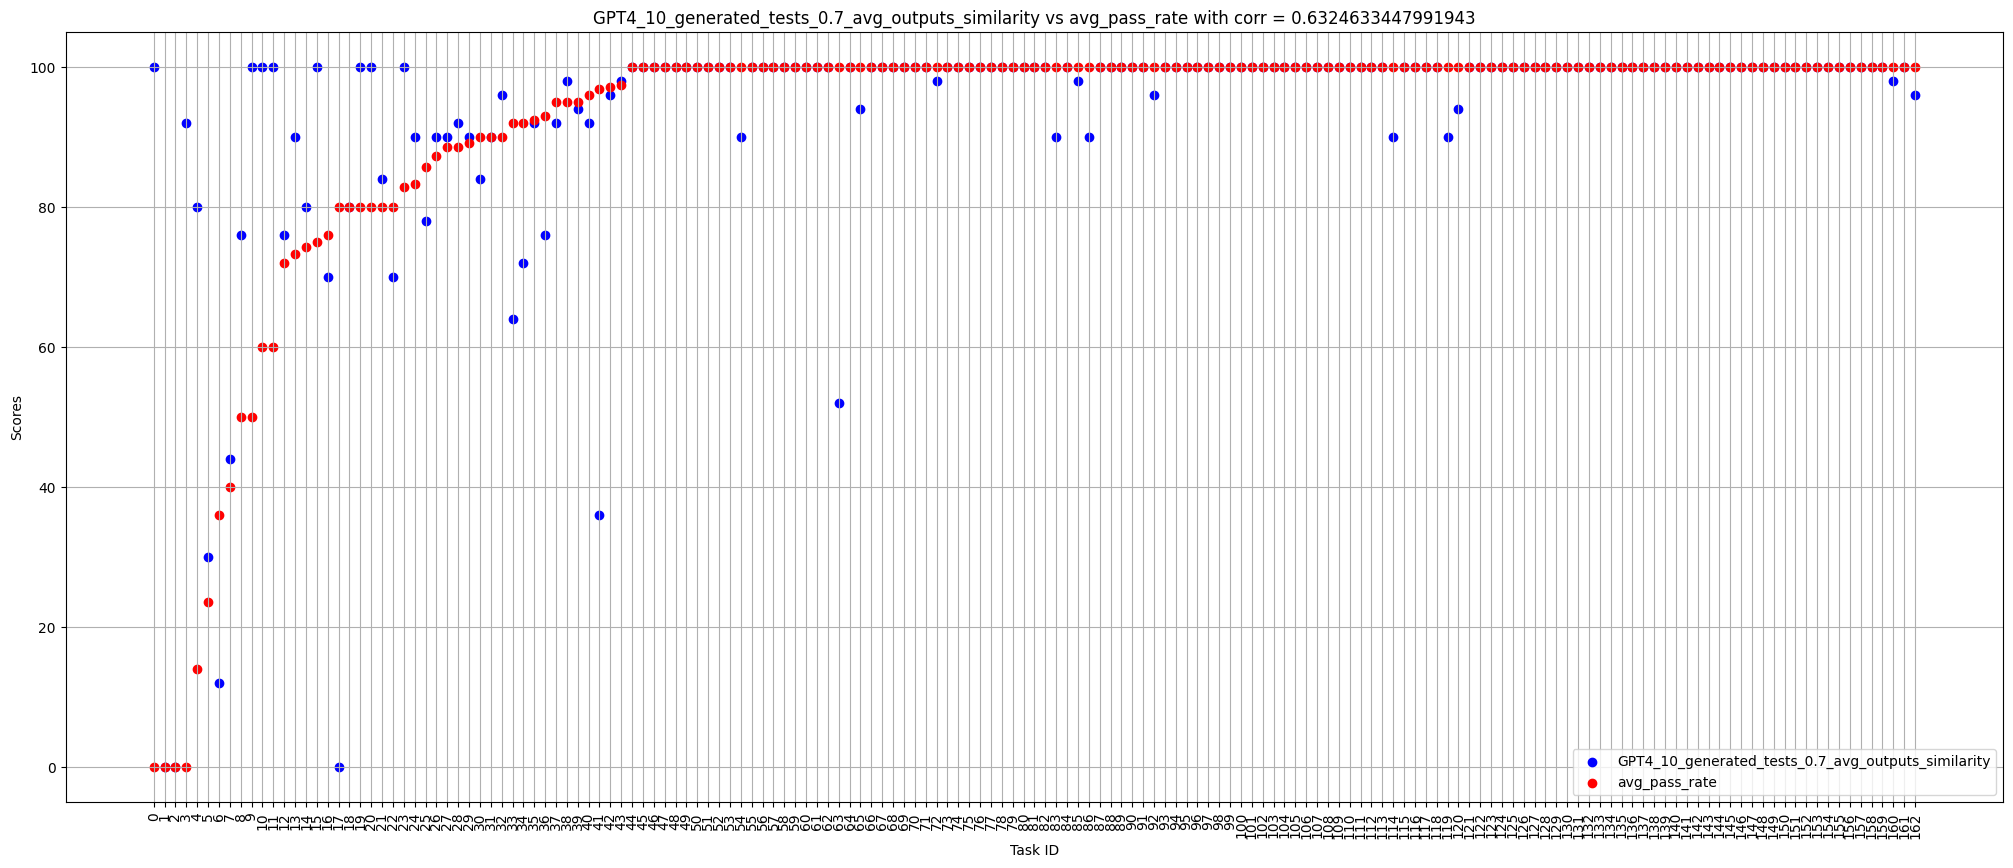

In [18]:
visualize_corr(df_with_codes[df_with_codes['avg_pass_rate'] <= 100].sort_values(by = ['avg_pass_rate','task_id']), 'avg_pass_rate', f'GPT4_{tests_num}_generated_tests_{tests_temperature}_avg_outputs_similarity')

In [17]:
# df_with_codes = pd.read_csv('runs\gpt4_codes\codetemp_1\\test_cases_results_after_mod.csv')

In [60]:
df_with_codes.to_csv('test_cases_results.csv', index=False)

In [ ]:
temp_df = pd.read_csv('test_cases_results.csv')

merged_df = pd.merge(temp_df, df_with_codes, on=['task_id'], how='left', suffixes=('_temp', '_df_with_codes'))

for col in df_with_codes.columns.difference(['task_id']):
    if col in temp_df.columns:
        merged_df[col] = merged_df[col + '_df_with_codes']
        merged_df.drop(col + '_df_with_codes', axis=1, inplace=True)
        merged_df.drop(col + '_temp', axis=1, inplace=True)


front_cols = ['task_id', 'prompt', 'code_0', 'code_1', 'code_2', 'code_3', 'code_4', 'code_5', 'avg_pass_rate']
other_cols = [col for col in merged_df.columns if col not in front_cols]
order = front_cols + other_cols

merged_df = merged_df[order]

merged_df.to_csv('test_cases_results.csv', index=False)

In [24]:
merged_df

,task_id,prompt,code_0,code_1,code_2,code_3,code_4,code_5,avg_pass_rate,GPT4_10_generated_tests_1_avg_outputs_similarity,...,GPT4_10_generated_tests_1_outputs_similarity,GPT4_10_generated_tests_0.7_outputs,GPT4_10_generated_tests_0.7_outputs_similarity,GPT4_10_generated_tests_0.7_avg_outputs_similarity,GPT4_10_generated_tests_0.5,GPT4_10_generated_tests_0.5_outputs,GPT4_10_generated_tests_0.5_outputs_similarity,GPT4_10_generated_tests_0.5_avg_outputs_similarity,GPT4_10_generated_tests_0.7,GPT4_10_generated_tests_1
0,HumanEval/0,from typing import List\n\n\ndef has_close_ele...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,100.000000,100.0,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[['False', 'False', 'False', 'False', 'False',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...","[[False, False, False, False, False, False], [...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...","has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h..."
1,HumanEval/1,from typing import List\n\n\ndef separate_pare...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,100.000000,100.0,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[""['((()))']"", ""['((()))']"", ""['((()))']"", ""[...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"separate_paren_groups(""()"")#lak#separate_paren...","[[['()'], ['()'], ['()'], ['()'], ['()'], ['()...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,separate_paren_groups('((()))')#lak#separate_p...,separate_paren_groups('')#lak#separate_paren_g...
2,HumanEval/2,\n\ndef truncate_number(number: float) -> floa...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,100.000000,100.0,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[['0.7599999999999998', '0.7599999999999998', ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,truncate_number(5.0)#lak#truncate_number(0.999...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.999, 0.999...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,truncate_number(4.76)#lak#truncate_number(0.99...,truncate_number(5.0)#lak#truncate_number(1.987...
3,HumanEval/3,from typing import List\n\n\ndef below_zero(op...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,100.000000,100.0,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[['False', 'False', 'False', 'False', 'False',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"below_zero([1, 2, 3])#lak#below_zero([1, 2, -4...","[[False, False, False, False, False, False], [...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"below_zero([1, 2, 3])#lak#below_zero([1, 2, -4...","below_zero([10, -5, 5, -10])#lak#below_zero([1..."
4,HumanEval/4,from typing import List\n\n\ndef mean_absolute...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing imp

# Investigating Errors:

In [50]:
tests_num = 10
tests_temperature = 1
df = pd.read_csv('test_cases_results.csv')
temp = pd.read_json('human-eval-modified-with-tests.jsonl', lines=True)
df['test'] = temp['test']
df.head()

,task_id,prompt,code_0,code_1,code_2,code_3,code_4,code_5,avg_pass_rate,GPT4_10_generated_tests_1_avg_outputs_similarity,GPT4_10_generated_tests_1_outputs,GPT4_10_generated_tests_1_outputs_similarity,GPT4_10_generated_tests_0.7_outputs,GPT4_10_generated_tests_0.7_outputs_similarity,GPT4_10_generated_tests_0.7_avg_outputs_similarity,GPT4_10_generated_tests_0.7,GPT4_10_generated_tests_1,test
0,HumanEval/0,from typing import List\n\n\ndef has_close_ele...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,from typing import List\n\ndef has_close_eleme...,100.0,100.0,"[['False', 'False', 'False', 'False', 'False',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[['False', 'False', 'False', 'False', 'False',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...","has_close_elements([1.0, 2.0, 3.0], 0.5)#lak#h...","\n\nMETADATA = {\n 'author': 'jt',\n 'da..."
1,HumanEval/1,from typing import List\n\n\ndef separate_pare...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,from typing import List\n\ndef separate_paren_...,100.0,100.0,"[['[]', '[]', '[]', '[]', '[]', '[]'], [""['()'...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[""['((()))']"", ""['((()))']"", ""['((()))']"", ""[...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,separate_paren_groups('((()))')#lak#separate_p...,separate_paren_groups('')#lak#separate_paren_g...,"\n\nMETADATA = {\n 'author': 'jt',\n 'da..."
2,HumanEval/2,\n\ndef truncate_number(number: float) -> floa...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,def truncate_number(number: float) -> float:\n...,100.0,100.0,"[['0.0', '0.0', '0.0', '0.0', '0.0', '0.0'], [...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[['0.7599999999999998', '0.7599999999999998', ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,truncate_number(4.76)#lak#truncate_number(0.99...,truncate_number(5.0)#lak#truncate_number(1.987...,"\n\nMETADATA = {\n 'author': 'jt',\n 'da..."
3,HumanEval/3,from typing import List\n\n\ndef below_zero(op...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,from typing import List\n\ndef below_zero(oper...,100.0,100.0,"[['False', 'False', 'False', 'False', 'False',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[['False', 'False', 'False', 'False', 'False',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"below_zero([1, 2, 3])#lak#below_zero([1, 2, -4...","below_zero([10, -5, 5, -10])#lak#below_zero([1...","\n\nMETADATA = {\n 'author': 'jt',\n 'da..."
4,HumanEval/4,from typing import List\n\n\ndef mean_absolute...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,from typing import List\n\ndef mean_absolute_d...,100.0,90.0,"[['1.2', '1.2', '1.2', '1.2', '1.2', '1.2'], [...","[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...","[['1.0', '1.0', '1.0', '1.0', '1.0', '1.0'], [...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"mean_absolute_deviation([1.0, 2.0, 3.0, 4.0])#...","mean_

In [47]:
# get all rows with difference between average_pass_rate and average_test_pass_rate = 70
low_df = df[abs(df['avg_pass_rate'] - df[f'GPT4_{tests_num}_generated_tests_{tests_temperature}_avg_outputs_similarity']) >= 25]
low_df

,task_id,prompt,code_0,code_1,code_2,code_3,code_4,code_5,avg_pass_rate,GPT4_10_generated_tests_1_avg_outputs_similarity,GPT4_10_generated_tests_1_outputs,GPT4_10_generated_tests_1_outputs_similarity,GPT4_10_generated_tests_0.7_outputs,GPT4_10_generated_tests_0.7_outputs_similarity,GPT4_10_generated_tests_0.7_avg_outputs_similarity,GPT4_10_generated_tests_0.7,GPT4_10_generated_tests_1,test
38,HumanEval/39,"\n\ndef prime_fib(n: int):\n """"""\n prime...",import sympy\n\ndef prime_fib(n: int) -> int:\...,import math\n\ndef is_prime(num: int) -> bool:...,from sympy import isprime\n\ndef prime_fib(n: ...,import sympy\n\ndef prime_fib(n: int) -> int:\...,from sympy import isprime\n\ndef prime_fib(n: ...,import sympy\n\ndef prime_fib(n: int) -> int:\...,20.000000,86.0,"[['2', '2', '2', '2', '2', '2'], ['3', '3', '3...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.8, ...","[['2', '2', '2', '2', '2', '2'], ['3', '3', '3...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,prime_fib(1)#lak#prime_fib(2)#lak#prime_fib(3)...,prime_fib(1)#lak#prime_fib(2)#lak#prime_fib(3)...,\n\nMETADATA = {}\n\n\ndef check(candidate):\n...
53,HumanEval/54,"\n\ndef same_chars(s0: str, s1: str):\n """"""...",from collections import Counter\n\ndef same_ch...,from collections import Counter\n\ndef same_ch...,"def same_chars(s0: str, s1: str) -> bool:\n ...",from collections import Counter\n\ndef same_ch...,"def same_chars(s0: str, s1: str) -> bool:\n ...",from collections import Counter\n\ndef same_ch...,74.285714,100.0,"[['True', 'True', 'True', 'True', 'True', 'Tru...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[['True', 'True', 'True', 'True', 'True', 'Tru...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"same_chars('hello', 'loleh')#lak#same_chars('a...","same_chars('abc', 'cba')#lak#same_chars('a', '...",\n\nMETADATA = {}\n\n\ndef check(candidate):\n...
74,HumanEval/75,"\ndef is_multiply_prime(a):\n """"""Write a fu...",import math\n\ndef is_prime(n):\n if n <= 1...,from sympy import isprime\n\ndef is_multiply_p...,from sympy import isprime\n\ndef is_multiply_p...,from sympy import isprime\n\ndef is_multiply_p...,from sympy import isprime\n\ndef is_multiply_p...,from sympy import isprime\n\ndef is_multiply_p...,0.000000,84.0,"[['True', 'True', 'True', 'True', 'True', 'Tru...","[1.0, 0.8, 1.0, 0.6, 0.6, 1.0, 0.8, 0.8, 1.0, ...","[['False', 'False', 'False', 'False', 'team5_L...","[0.8, 1.0, 0.8, 0.8, 0.8, 0.8, 1.0, 0.8, 0.8, ...",84.0,is_multiply_prime(1)#lak#is_multiply_prime(30)...,is_multiply_prime(30)#lak#is_multiply_prime(7)...,def check(candidate):\n total_tests_xyz = 9...
100,HumanEval/101,"\ndef words_string(s):\n """"""\n You will ...","import re\n\ndef words_string(s):\n """"""\n ...",import re\n\ndef words_string(s):\n return ...,"import re\n\ndef words_string(s):\n """"""\n ...","import re\n\ndef words_string(s):\n """"""\n ...","import re\n\ndef words_string(s):\n """"""\n ...","import re\n\ndef words_string(s):\n """"""\n ...",50.000000,98.0,"[[""['Hello', 'World']"", ""['Hello', 'World']"", ...","[1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[""['Hi', 'my', 'name', 'is', 'John']"", ""['Hi'...","[1.0, 1.0, 1.0, 1.0, 0.8, 0.8, 1.0, 0.8, 1.0, ...",94.0,"words_string(""Hi, my name is John"")#lak#words_...","words_string(""Hello, World"")#lak#words_string(...",def check(candidate):\n total_tests_xyz = 5...
122,HumanEval/123,"\ndef get_odd_collatz(n):\n """"""\n Given ...","def get_odd_collatz(n):\n """"""\n Given a ...","def get_odd_collatz(n):\n """"""\n Given a ...","def get_odd_collatz(n):\n """"""\n Given a ...","def get_odd_collatz(n):\n """"""\n Given a ...","def get_odd_collatz(n):\n """"""\n Given a ...","def get_odd_collatz(n):\n """"""\n Given a ...",100.000000,44.0,"[['[1]', '[1]', '[1]', '[1]', '[1]', '[1]'], [...","[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 1.0, 0.2, 0.2, ...","[['[1]', '[1]', '[1]', '[1]', '[1]', '[1]'], [...","[1.0, 1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1.0, ...",44.0,get_odd_collatz(1)#lak#

In [48]:
false_positives = []
false_negatives = []
for i, row in enumerate(low_df.iterrows()):
    if (row[1]['avg_pass_rate'] < row[1][f'GPT4_{tests_num}_generated_tests_{tests_temperature}_avg_outputs_similarity']):
        false_positives.append(i)
    else:
        false_negatives.append(i)
print(false_positives)
print(false_negatives)

[0, 1, 2, 3, 5, 7, 9, 11, 12]
[4, 6, 8, 10]


In [49]:
false_negatives_df = low_df.iloc[false_negatives]
false_negatives_df

,task_id,prompt,code_0,code_1,code_2,code_3,code_4,code_5,avg_pass_rate,GPT4_10_generated_tests_1_avg_outputs_similarity,GPT4_10_generated_tests_1_outputs,GPT4_10_generated_tests_1_outputs_similarity,GPT4_10_generated_tests_0.7_outputs,GPT4_10_generated_tests_0.7_outputs_similarity,GPT4_10_generated_tests_0.7_avg_outputs_similarity,GPT4_10_generated_tests_0.7,GPT4_10_generated_tests_1,test
38,HumanEval/39,"\n\ndef prime_fib(n: int):\n """"""\n prime...",import sympy\n\ndef prime_fib(n: int) -> int:\...,import math\n\ndef is_prime(num: int) -> bool:...,from sympy import isprime\n\ndef prime_fib(n: ...,import sympy\n\ndef prime_fib(n: int) -> int:\...,from sympy import isprime\n\ndef prime_fib(n: ...,import sympy\n\ndef prime_fib(n: int) -> int:\...,20.000000,86.0,"[['2', '2', '2', '2', '2', '2'], ['3', '3', '3...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.8, ...","[['2', '2', '2', '2', '2', '2'], ['3', '3', '3...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,prime_fib(1)#lak#prime_fib(2)#lak#prime_fib(3)...,prime_fib(1)#lak#prime_fib(2)#lak#prime_fib(3)...,\n\nMETADATA = {}\n\n\ndef check(candidate):\n...
53,HumanEval/54,"\n\ndef same_chars(s0: str, s1: str):\n """"""...",from collections import Counter\n\ndef same_ch...,from collections import Counter\n\ndef same_ch...,"def same_chars(s0: str, s1: str) -> bool:\n ...",from collections import Counter\n\ndef same_ch...,"def same_chars(s0: str, s1: str) -> bool:\n ...",from collections import Counter\n\ndef same_ch...,74.285714,100.0,"[['True', 'True', 'True', 'True', 'True', 'Tru...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[['True', 'True', 'True', 'True', 'True', 'Tru...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"same_chars('hello', 'loleh')#lak#same_chars('a...","same_chars('abc', 'cba')#lak#same_chars('a', '...",\n\nMETADATA = {}\n\n\ndef check(candidate):\n...
74,HumanEval/75,"\ndef is_multiply_prime(a):\n """"""Write a fu...",import math\n\ndef is_prime(n):\n if n <= 1...,from sympy import isprime\n\ndef is_multiply_p...,from sympy import isprime\n\ndef is_multiply_p...,from sympy import isprime\n\ndef is_multiply_p...,from sympy import isprime\n\ndef is_multiply_p...,from sympy import isprime\n\ndef is_multiply_p...,0.000000,84.0,"[['True', 'True', 'True', 'True', 'True', 'Tru...","[1.0, 0.8, 1.0, 0.6, 0.6, 1.0, 0.8, 0.8, 1.0, ...","[['False', 'False', 'False', 'False', 'team5_L...","[0.8, 1.0, 0.8, 0.8, 0.8, 0.8, 1.0, 0.8, 0.8, ...",84.0,is_multiply_prime(1)#lak#is_multiply_prime(30)...,is_multiply_prime(30)#lak#is_multiply_prime(7)...,def check(candidate):\n total_tests_xyz = 9...
100,HumanEval/101,"\ndef words_string(s):\n """"""\n You will ...","import re\n\ndef words_string(s):\n """"""\n ...",import re\n\ndef words_string(s):\n return ...,"import re\n\ndef words_string(s):\n """"""\n ...","import re\n\ndef words_string(s):\n """"""\n ...","import re\n\ndef words_string(s):\n """"""\n ...","import re\n\ndef words_string(s):\n """"""\n ...",50.000000,98.0,"[[""['Hello', 'World']"", ""['Hello', 'World']"", ...","[1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[""['Hi', 'my', 'name', 'is', 'John']"", ""['Hi'...","[1.0, 1.0, 1.0, 1.0, 0.8, 0.8, 1.0, 0.8, 1.0, ...",94.0,"words_string(""Hi, my name is John"")#lak#words_...","words_string(""Hello, World"")#lak#words_string(...",def check(candidate):\n total_tests_xyz = 5...
126,HumanEval/127,"\ndef intersection(interval1, interval2):\n ...",from sympy import isprime\n\ndef intersection(...,"import math\n\ndef intersection(interval1, int...",from sympy import isprime\n\ndef intersection(...,"import math\n\ndef intersection(interval1, int...",from sympy import isprime\n\ndef intersection(...,"import math\n\ndef is_prime(num):\n """""" Hel...",45.000000,100.0,"[['NO', 'NO', 'NO', 'NO', 'NO', 'NO'], ['YES',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[['NO', 'NO', 'NO', 'NO', 'NO', 'NO'], ['YES',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"intersec

In [39]:
prompt = false_negatives_df.iloc[0]['prompt']
codes = list(false_negatives_df.iloc[0][['code_0', 'code_1', 'code_2', 'code_3', 'code_4', 'code_5']])
tests = false_negatives_df.iloc[0][f'GPT4_{tests_num}_generated_tests_{tests_temperature}'].split('#lak#')

print(prompt)
print('----------------')
for test in tests:
    print(test)


def get_odd_collatz(n):
    """
    Given a positive integer n, return a sorted list that has the odd numbers in collatz sequence.

    The Collatz conjecture is a conjecture in mathematics that concerns a sequence defined
    as follows: start with any positive integer n. Then each term is obtained from the 
    previous term as follows: if the previous term is even, the next term is one half of 
    the previous term. If the previous term is odd, the next term is 3 times the previous
    term plus 1. The conjecture is that no matter what value of n, the sequence will always reach 1.

    Note: 
        1. Collatz(1) is [1].
        2. returned list sorted in increasing order.

    For example:
    get_odd_collatz(5) returns [1, 5] # The collatz sequence for 5 is [5, 16, 8, 4, 2, 1], so the odd numbers are only 1, and 5.
    """

----------------
get_odd_collatz(1)
get_odd_collatz(2)
get_odd_collatz(3)
get_odd_collatz(6)
get_odd_collatz(7)
get_odd_collatz(15)
get_odd_collatz(22)
get_

In [40]:
for code in codes:
    print(code)
    print('----------------')

def get_odd_collatz(n):
    """
    Given a positive integer n, return a sorted list that has the odd numbers in collatz sequence.

    The Collatz conjecture is a conjecture in mathematics that concerns a sequence defined
    as follows: start with any positive integer n. Then each term is obtained from the 
    previous term as follows: if the previous term is even, the next term is one half of 
    the previous term. If the previous term is odd, the next term is 3 times the previous
    term plus 1. The conjecture is that no matter what value of n, the sequence will always reach 1.

    Note: 
        1. Collatz(1) is [1].
        2. returned list sorted in increasing order.

    For example:
    get_odd_collatz(5) returns [1, 5] # The collatz sequence for 5 is [5, 16, 8, 4, 2, 1], so the odd numbers are only 1, and 5.
    """
    sequence = []
    while n != 1:
        if n % 2 == 0:
            n = n / 2
        else:
            sequence.append(n)
            n = 3 * n + 1
    se

In [41]:
import ast
outputs = false_negatives_df[f'GPT4_{tests_num}_generated_tests_{tests_temperature}_outputs'][122]
sims = false_negatives_df[f'GPT4_{tests_num}_generated_tests_{tests_temperature}_outputs_similarity'][122]

outputs = ast.literal_eval(outputs)
sims = ast.literal_eval(sims)

for i in range(10):
    print(outputs[i])
    print(sims[i])

['[1]', '[1]', '[1]', '[1]', '[1]', '[1]']
1.0
['[1]', '[1]', '[1]', '[1]', '[1]', '[1]']
1.0
['[1, 3, 5.0]', '[1, 3, 5]', '[1, 3, 5]', '[1, 3, 5.0]', '[1, 3, 5]', '[1, 3, 5]']
0.2
['[1, 3.0, 5.0]', '[1, 3, 5]', '[1, 3, 5]', '[1, 3.0, 5.0]', '[1, 3, 5]', '[1, 3, 5]']
0.2
['[1, 5.0, 7, 11.0, 13.0, 17.0]', '[1, 5, 7, 11, 13, 17]', '[1, 5, 7, 11, 13, 17]', '[1, 5.0, 7, 11.0, 13.0, 17.0]', '[1, 5, 7, 11, 13, 17]', '[1, 5, 7, 11, 13, 17]']
0.2
['[1, 5.0, 15, 23.0, 35.0, 53.0]', '[1, 5, 15, 23, 35, 53]', '[1, 5, 15, 23, 35, 53]', '[1, 5.0, 15, 23.0, 35.0, 53.0]', '[1, 5, 15, 23, 35, 53]', '[1, 5, 15, 23, 35, 53]']
0.2
['[1, 5.0, 11.0, 13.0, 17.0]', '[1, 5, 11, 13, 17]', '[1, 5, 11, 13, 17]', '[1, 5.0, 11.0, 13.0, 17.0]', '[1, 5, 11, 13, 17]', '[1, 5, 11, 13, 17]']
0.2
['[1, 5.0, 11.0, 13.0, 17.0, 19.0, 25.0, 29.0]', '[1, 5, 11, 13, 17, 19, 25, 29]', '[1, 5, 11, 13, 17, 19, 25, 29]', '[1, 5.0, 11.0, 13.0, 17.0, 19.0, 25.0, 29.0]', '[1, 5, 11, 13, 17, 19, 25, 29]', '[1, 5, 11, 13, 17, 19, 25, 

In [41]:
test_prepared = f"print({tests[0]})"
check_program = f"{codes[4]}\n{test_prepared}"
print(check_program, '\n----------------\n')
res, err = run_tests(check_program, test_number = 1, code_number = 0 ,task_id = 122, timeout=40 )
print(res)
print(50*"-")
print(err)

from sympy import isprime

def is_multiply_prime(a):
    """Write a function that returns true if the given number is the multiplication of 3 prime numbers
    and false otherwise.
    Knowing that (a) is less then 100. 
    Example:
    is_multiply_prime(30) == True
    30 = 2 * 3 * 5
    """
    for i in range(2, a):
        if isprime(i) and a % i == 0:
            a //= i
            break
    for j in range(i+1, a):
        if isprime(j) and a % j == 0:
            a //= j
            break
    return isprime(a) and a != j and a > 1
print(is_multiply_prime(1)) 
----------------


--------------------------------------------------
Traceback (most recent call last):
  File "<string>", line 20, in <module>
  File "<string>", line 15, in is_multiply_prime
UnboundLocalError: cannot access local variable 'i' where it is not associated with a value


FP[0]: problem is in HE tests cause the codes return correct and similar answers for the generated tests
FP[1]: prompt is vague so HE tests and generated tests might be measuring different things
FP[2]: prompt vague; didn't specify if 3 unique primes or not
FP[3]: codes working fine on generated tests. need to check why not fine on HE tests
FP[4], [5]: codes are wrong but similar
FP[6]: codes are wrong but similar and prompt is not clear if they wanna consider -ve or not
FP[7]: codes are wrong but similar as they don't adhere to order of opearions --> only with temp 0.7 but not in 1
FP[8]: need to check HE. codes are correct and similar

FN[0]: problems with exact match. ex: base code returns: '[1, 3.0, 5.0]', samples return: '[1, 3, 5]'
FN[1]: base code is wrong while rest of codes are sometimes correct; means HE tests are not exhaustive 
FN[2]: all codes are wrong but base is more wrong than others; look at test 3 and test 8 
FN[3]: prompt gives two entry points so generated codes are mixed and tests fail to call the right function

In [130]:
# SAMPLE 109
df1 = pd.read_csv('first results.csv')
df2 = pd.read_csv('test_cases_results.csv')
temp = pd.read_json('human-eval-modified-with-tests.jsonl', lines=True)
df1['test'], df2['test'] = temp['test'], temp['test']

In [131]:
df1 = df1[df1['average_pass_rate'] > 95]
df2 = df2[df2['avg_pass_rate'] > 95]
df2

,task_id,prompt,GPT4_10_generated_tests,code_0,code_1,code_2,code_3,code_4,code_5,avg_pass_rate,GPT4_10_generated_tests_output,GPT4_10_generated_tests_outputs_similarity,GPT4_10_generated_tests_avg_outputs_similarity,test
0,HumanEval/0,from typing import List\n\n\ndef has_close_ele...,"has_close_elements([], 1.0)#lak#has_close_elem...",\nfrom typing import List\n\ndef has_close_ele...,\nfrom typing import List\n\n\ndef has_close_e...,\nfrom typing import List\n\n\ndef has_close_e...,\nfrom typing import List\n\n\ndef has_close_e...,\nfrom typing import List\n\n\ndef has_close_e...,\nfrom typing import List\n\n\ndef has_close_e...,100.0,"[['False', 'False', 'False', 'False', 'False',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"\n\nMETADATA = {\n 'author': 'jt',\n 'da..."
2,HumanEval/2,\n\ndef truncate_number(number: float) -> floa...,truncate_number(0.75)#lak#truncate_number(10.0...,\nfrom math import floor\n\ndef truncate_numbe...,\nfrom math import trunc\n\ndef truncate_numbe...,\nfrom math import floor\n\ndef truncate_numbe...,\nfrom math import floor\n\ndef truncate_numbe...,\nfrom math import floor\n\ndef truncate_numbe...,\nfrom math import floor\n\ndef truncate_numbe...,100.0,"[['0.75', '0.75', '0.75', '0.75', '0.75', '0.7...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"\n\nMETADATA = {\n 'author': 'jt',\n 'da..."
3,HumanEval/3,from typing import List\n\n\ndef below_zero(op...,"below_zero([100, -50, -30])#lak#below_zero([-1...",\nfrom typing import List\n\n\ndef below_zero(...,\nfrom typing import List\n\ndef below_zero(op...,\nfrom typing import List\n\ndef below_zero(op...,\nfrom typing import List\n\ndef below_zero(op...,\nfrom typing import List\n\n\ndef below_zero(...,\nfrom typing import List\n\n\ndef below_zero(...,100.0,"[['False', 'False', 'False', 'False', 'False',...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"\n\nMETADATA = {\n 'author': 'jt',\n 'da..."
4,HumanEval/4,from typing import List\n\n\ndef mean_absolute...,"mean_absolute_deviation([1.0, 2.0, 3.0, 4.0, 5...",\nfrom typing import List\n\n\ndef mean_absolu...,\nfrom typing import List\n\ndef mean_absolute...,\nfrom typing import List\n\ndef mean_absolute...,\nfrom typing import List\n\ndef mean_absolute...,\nfrom typing import List\n\ndef mean_absolute...,\nfrom typing import List\n\ndef mean_absolute...,100.0,"[['1.2', '1.2', '1.2', '1.2', '1.2', '1.2'], [...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"\n\nMETADATA = {\n 'author': 'jt',\n 'da..."
7,HumanEval/7,from typing import List\n\n\ndef filter_by_sub...,"filter_by_substring(['hello', 'world'], 'o')#l...",\nfrom typing import List\n\ndef filter_by_sub...,\nfrom typing import List\n\ndef filter_by_sub...,\nfrom typing import List\n\ndef filter_by_sub...,\nfrom typing import List\n\ndef filter_by_sub...,\nfrom typing import List\n\n\ndef filter_by_s...,\nfrom typing import List\n\n\ndef filter_by_s...,100.0,"[[""['hello', 'world']"", ""['hello', 'world']"", ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,"\n\nMETADATA = {\n 'author': 'jt',\n 'da..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,HumanEval/152,"\ndef compare(game,guess):\n """"""I think we ...","compare([1, 2, 3, 4, 5, 1], [1, 2, 3, 4, 2, -2...",\nfrom typing import List\n\ndef compare(game:...,\nfrom typing import List\n\ndef compare(game:...,\nfrom typing import List\n\ndef compare(game:...,\nfrom typing import List\n\ndef compare(game:...,\nfrom typing import List\n\ndef compare(game:...,\nfrom typing import List\n\ndef compare(game:...,100.0,"[['[0, 0, 0, 0, 3, 3]', '[0, 0, 0, 0, 3, 3]', ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",100.0,def check(candidate):\n total_tests_xyz = 4...
155,HumanEval/155,"\ndef even_odd_count(num):\n """"""Given an in...",even_odd_count(0)#lak#even_odd_count(123456789...,"\ndef even_odd_count(num):\n """"""Given an in...",\ndef even_odd_count(num):\n num_str = str(...,\ndef even_odd_count(n

In [133]:
not_equals_df = df2[df1['average_tests_pass_rate'] != df2[f'GPT4_{tests_num}_generated_tests_{tests_temperature}_avg_outputs_similarity']]
not_equals_df = pd.merge(not_equals_df, df1, on='task_id', how='inner')
not_equals_df

,task_id,prompt_x,GPT4_10_generated_tests,code_0_x,code_1_x,code_2_x,code_3_x,code_4_x,code_5_x,avg_pass_rate,...,test_3_pass_rate,test_4_pass_rate,test_5_pass_rate,test_6_pass_rate,test_7_pass_rate,test_8_pass_rate,test_9_pass_rate,test_10_pass_rate,average_tests_pass_rate,test_y
0,HumanEval/78,"\ndef hex_key(num):\n """"""You have been task...","hex_key(""AB"")#lak#hex_key(""1077E"")#lak#hex_key...",\ndef hex_key(num):\n def is_prime(n):\n ...,\nimport sympy\n\ndef hex_key(num):\n prime...,\nfrom sympy import isprime\n\ndef hex_key(num...,\nfrom sympy import isprime\n\ndef hex_key(num...,\nimport math\n\ndef hex_key(num):\n def is...,\nimport re\nfrom sympy import isprime\n\ndef ...,100.0,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,20.0,def check(candidate):\n total_tests_xyz = 7...
1,HumanEval/94,"\n\ndef skjkasdkd(lst):\n """"""You are given ...","skjkasdkd([0,3,2,1,3,5,7,4,5,5,5,2,181,32,4,32...",\nimport math\n\ndef skjkasdkd(lst):\n def ...,\nimport math\n\ndef skjkasdkd(lst):\n def ...,\nimport sympy\n\ndef skjkasdkd(lst):\n pri...,\nimport math\n\ndef skjkasdkd(lst):\n def ...,\nimport math\n\ndef skjkasdkd(lst):\n def ...,\nimport sympy\n\ndef skjkasdkd(lst):\n def...,100.0,...,0.6,0.6,0.6,0.6,1.0,1.0,1.0,1.0,76.0,def check(candidate):\n total_tests_xyz = 9...
2,HumanEval/143,"\ndef words_in_sentence(sentence):\n """"""\n ...","words_in_sentence(""This is a test"")#lak#words_...",\nfrom sympy import isprime\n\ndef words_in_se...,\nfrom sympy import isprime\n\ndef words_in_se...,\nimport sympy\n\ndef words_in_sentence(senten...,\nfrom sympy import isprime\n\ndef words_in_se...,\nimport sympy\n\ndef words_in_sentence(senten...,\nimport math\n\ndef is_prime(n):\n if n < ...,100.0,...,1.0,0.8,0.8,0.8,0.8,0.8,1.0,0.8,84.0,def check(candidate):\n total_tests_xyz = 7...


In [52]:
"""
[important case]: base is wrong i.e.:"", rest wrong but similar to base -> false positive "possibly no solution for this"
      depends on type cause if str it could be the case that the correct soln is an empty str
      
[important case]: base is correct, rest correct but different from base -> false negative "possibly no solution for this as there is no way to know if order matters or not"
      invistigate exact matches limitation, i.e.: [1,2,3] and [1,3,2] won't be similar because they get compared as a string

case: base is correct, rest correct and similar to base -> true positive

case: base is wrong, rest wrong but different from base -> true negative
case: base is wrong, rest correct but different from base -> true negative
"""

code =  df.iloc[0]["code_0"]
test = df.iloc[0]["test_1"]
test_prepared = f"print({test})"
test_prepared = test_prepared + "\n" + f"print(type({test}))"
check_program = f"{code}\n{test_prepared}"
res_vec = run_tests(check_program, test_number = 1, code_number = 0 ,task_id = 0, timeout=40)

res.split("\r\n")[0]
res_type = res.split("\r\n")[1]
res_type = res_type.split(" ")[1]

AttributeError: 'list' object has no attribute 'split'

FP
[Problem]sample #47, which is 2nd in false positives, returns empty strings because of a valid recursion error due to misnaming the function in the solution
    [sol] isolate any results with errors

[Problem]sample #122, which is 3rd in false positives, is a true false positive because chatgpt returns the same incorrect fn for the 6 codes so they are all wrong in the same way
    [sol]try a better model than 3.5

[Problem]sample #32, which is 1st in false positives, returns "" with tests 3-10 because its check program has a syntax error as the tests returned by chatgpt has comments so the ) closes after the comment and the ) for the print () is never closed. Code_0 in that sample returns "" too because of a type error as it uses the helper function in a wrong way. Code_1 with test 2 returns "" because of ValueError raised by the code 
    [sol]try a better model than 3.5
    [sol_to_implement_now]optimize prompt and watch stderr

FN
[Problem]sample #120, which is 2nd in false negatives, is an accurate false negative because the base code is wrong but the samples are correct
    the sample codes aren't all correct; see test 8 which should return []
    [sol]try better model, or don't solve

[Problem]sample #148, which is 3rd in false negatives, has base code with ValueError and rest of codes correct. base code also includes examples with print statements that might cause errors
    [sol]try a better model than 3.5

[Note]sample #47, which is 2nd in false positives, has all of its 6 codes identical because it's too simple
[Note]sample #32, which is 1st in false positives, has code_4 returning nothing so what should we do for no output functions